# Data Analysis
Looking at our data and deriving columns / defining correlations

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import os
import json

In [5]:
#setting up path to database and engine

load_dotenv()
database_url = os.getenv('DATABASE_URL')

engine = create_engine(database_url)

In [6]:
# Creating view for hourly wage

with engine.connect() as connection:
    connection.execute(text("CREATE OR REPLACE VIEW hourly_wage AS SELECT employeeid, (salary_usd / 2080) AS hourly_wage FROM employee WHERE employment_type = 'FT'"))
    connection.commit()

In [7]:
# Remote work statistics

print("Average remote ratio for employees working at company in their country: \n",
    pd.read_sql('' \
    'SELECT AVG(remote_ratio) ' \
    'FROM employee e JOIN company c ON e.companyid = c.companyid ' \
    'WHERE e.countryid = c.countryid', engine))


print("\nAverage remote ratio for employees NOT working at company in their country: \n",
    pd.read_sql('' \
    'SELECT AVG(remote_ratio) ' \
    'FROM employee e JOIN company c ON e.companyid = c.companyid ' \
    'WHERE e.countryid <> c.countryid', engine))


print("\nAverage remote ratio for employees working at small company: \n",
    pd.read_sql('' \
    'SELECT AVG(remote_ratio) ' \
    'FROM employee e JOIN company c ON e.companyid = c.companyid ' \
    "WHERE c.size = 'S'", engine))

print("\nAverage remote ratio for employees working at medium company: \n",
    pd.read_sql('' \
    'SELECT AVG(remote_ratio) ' \
    'FROM employee e JOIN company c ON e.companyid = c.companyid ' \
    "WHERE c.size = 'M'", engine))

print("\nAverage remote ratio for employees working at large company: \n",
    pd.read_sql('' \
    'SELECT AVG(remote_ratio) ' \
    'FROM employee e JOIN company c ON e.companyid = c.companyid ' \
    "WHERE c.size = 'L'", engine))

Average remote ratio for employees working at company in their country: 
          avg
0  31.571568

Average remote ratio for employees NOT working at company in their country: 
          avg
0  86.538462

Average remote ratio for employees working at small company: 
          avg
0  67.819149

Average remote ratio for employees working at medium company: 
          avg
0  31.392918

Average remote ratio for employees working at large company: 
          avg
0  34.519231


In [8]:
print("Average salary by job: \n",
      pd.read_sql('' \
      'SELECT job_title, AVG(salary_usd) AS average_salary ' \
      'FROM employee GROUP BY job_title ORDER BY average_salary DESC', engine))

Average salary by job: 
                           job_title  average_salary
0     Analytics Engineering Manager   399880.000000
1            Data Science Tech Lead   375000.000000
2          Head of Machine Learning   299758.428571
3    Managing Director Data Science   280000.000000
4                AWS Data Architect   258000.000000
..                              ...             ...
150   Quantitative Research Analyst    51000.000000
151                 Insight Analyst    50090.642857
152         Compliance Data Analyst    45000.000000
153                CRM Data Analyst    40000.000000
154        Principal Data Architect    38154.000000

[155 rows x 2 columns]


In [9]:
plt.style.use("seaborn-v0_8")

In [42]:
def graphIt(df):
    plt.bar(df.iloc[:,0], df.iloc[:,1])
    plt.xlabel(df.iloc[:,0].name)
    plt.ylabel(df.iloc[:,1].name)
    plt.show()

    plt.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2])
    plt.xlabel(df.iloc[:,0].name)
    plt.ylabel(df.iloc[:,1].name)
    plt.ylim(0, None)
    plt.show()

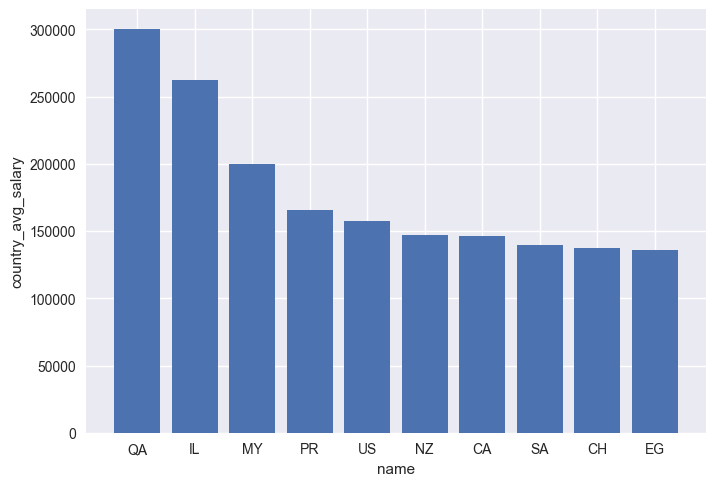

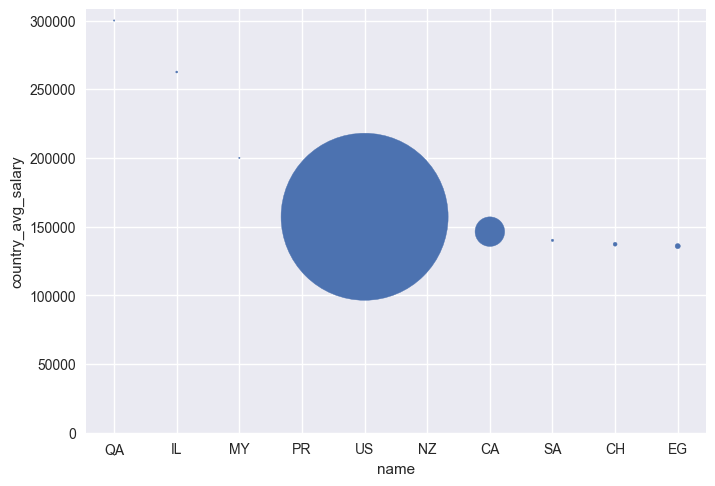

In [43]:
payByCountry = pd.read_sql("SELECT c.name, AVG(e.salary_usd) AS country_avg_salary, COUNT(*) AS ct FROM employee e JOIN country c ON e.countryid = c.countryid GROUP BY c.name ORDER BY country_avg_salary DESC LIMIT 10", engine)
graphIt(payByCountry)


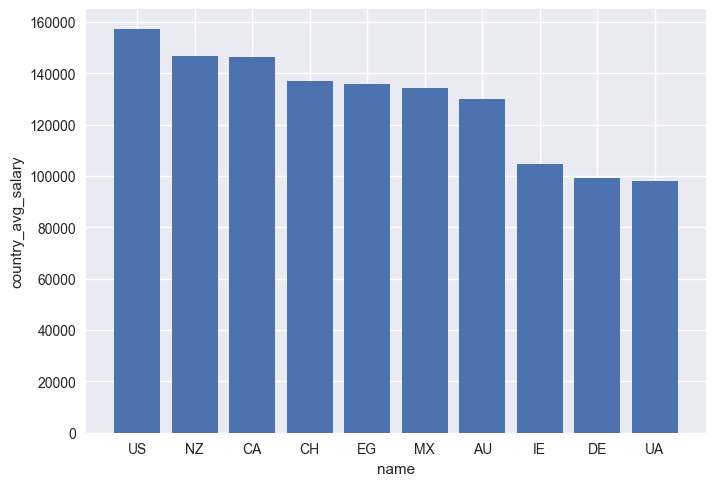

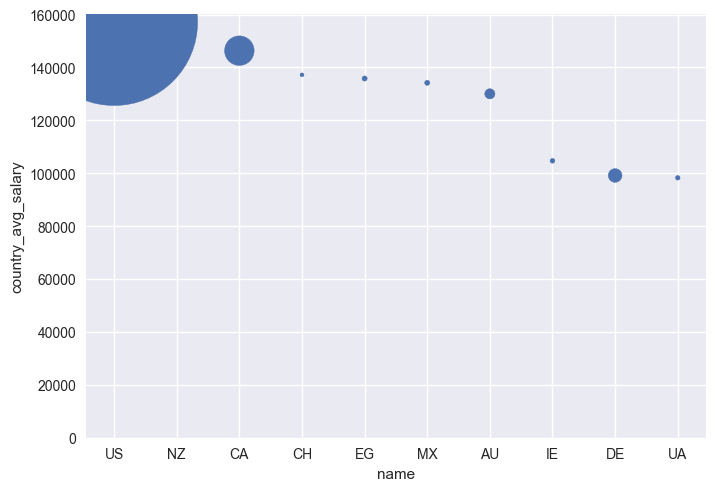

In [44]:
payByCountryRevised = pd.read_sql("SELECT c.name, AVG(e.salary_usd) AS country_avg_salary, COUNT(*) AS ct FROM employee e JOIN country c ON e.countryid = c.countryid GROUP BY c.name HAVING COUNT(*) > 5 ORDER BY country_avg_salary DESC LIMIT 10", engine)
graphIt(payByCountryRevised)

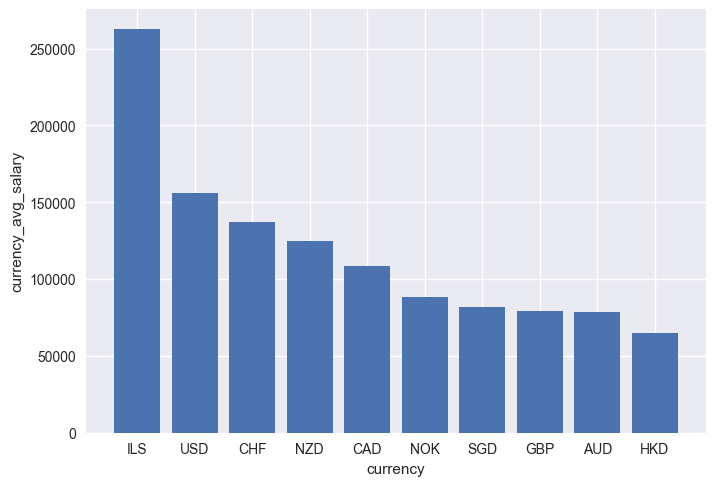

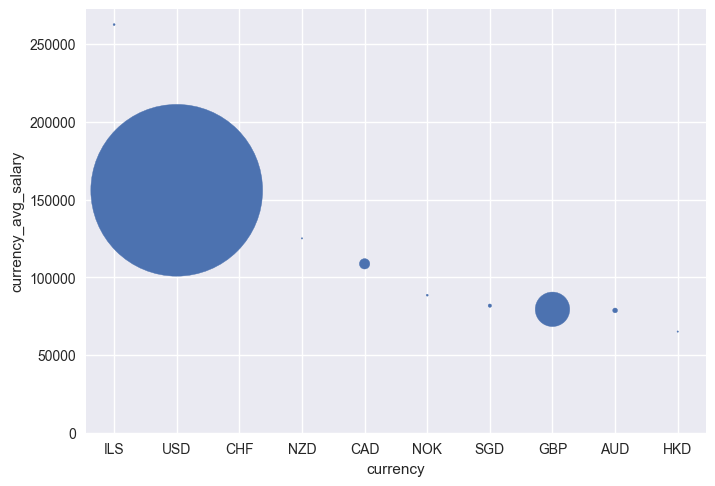

In [45]:
payByCurrency = pd.read_sql("SELECT currency, AVG(salary_usd) AS currency_avg_salary, COUNT(*) AS ct FROM employee GROUP BY currency ORDER BY currency_avg_salary DESC LIMIT 10", engine)
graphIt(payByCurrency)

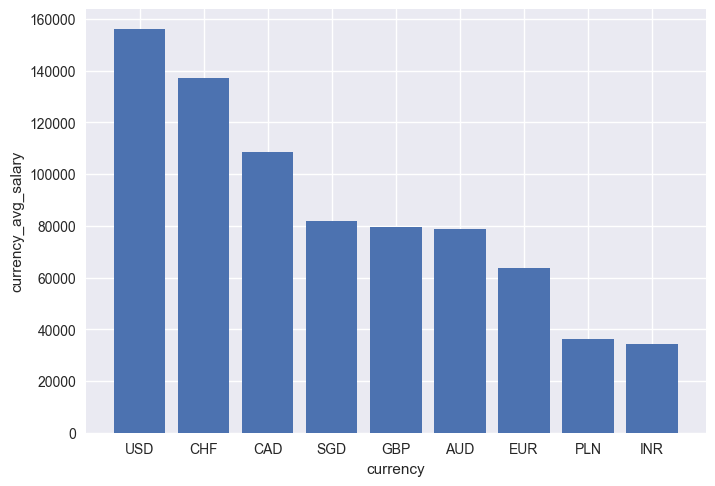

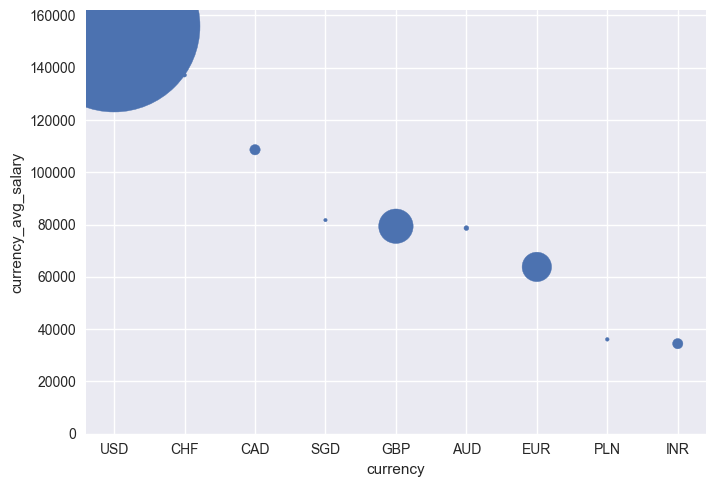

In [46]:
payByCurrencyRevised = pd.read_sql("SELECT currency, AVG(salary_usd) AS currency_avg_salary, COUNT(*) AS ct FROM employee GROUP BY currency HAVING COUNT(*) > 5 ORDER BY currency_avg_salary DESC LIMIT 10", engine)
graphIt(payByCurrencyRevised)

In [17]:
print(pd.read_sql("SELECT e.currency, c.name FROM employee e JOIN country c ON e.countryid = c.countryid WHERE name = 'NZ'", engine))

  currency name
0      USD   NZ
1      USD   NZ
2      USD   NZ
3      USD   NZ
4      NZD   NZ
5      USD   NZ
6      USD   NZ
7      USD   NZ


In [19]:
COUNTRY_TO_CURRENCY = {
    "AF": "AFN",    # Afghanistan
    "AL": "ALL",    # Albania
    "DZ": "DZD",    # Algeria
    "AS": "USD",    # American Samoa
    "AD": "EUR",    # Andorra
    "AO": "AOA",    # Angola
    "AI": "XCD",    # Anguilla / Eastern Caribbean Dollar
    "AG": "XCD",    # Antigua & Barbuda
    "AR": "ARS",    # Argentina
    "AM": "AMD",    # Armenia
    "AW": "AWG",    # Aruba
    "AU": "AUD",    # Australia
    "AT": "EUR",    # Austria
    "AZ": "AZN",    # Azerbaijan
    "BS": "BSD",    # Bahamas
    "BH": "BHD",    # Bahrain
    "BD": "BDT",    # Bangladesh
    "BB": "BBD",    # Barbados
    "BY": "BYN",    # Belarus (Belarusian ruble) — note: prior older codes may differ
    "BE": "EUR",    # Belgium
    "BZ": "BZD",    # Belize
    "BJ": "XOF",    # Benin (CFA Franc BCEAO)
    "BM": "BMD",    # Bermuda
    "BT": "BTN",    # Bhutan (Ngultrum)
    "BO": "BOB",    # Bolivia
    "BA": "BAM",    # Bosnia and Herzegovina (Convertible Mark)
    "BW": "BWP",    # Botswana
    "BR": "BRL",    # Brazil
    "BN": "BND",    # Brunei
    "BG": "BGN",    # Bulgaria
    "BF": "XOF",    # Burkina Faso (CFA Franc BCEAO)
    "BI": "BIF",    # Burundi
    "CV": "CVE",    # Cabo Verde (Cape Verdean Escudo)
    "KH": "KHR",    # Cambodia (Riel)
    "CM": "XAF",    # Cameroon (CFA Franc BEAC)
    "CA": "CAD",    # Canada
    "CF": "XAF",    # Central African Republic (CFA Franc BEAC)
    "TD": "XAF",    # Chad (CFA Franc BEAC)
    "CL": "CLP",    # Chile
    "CN": "CNY",    # China (Yuan Renminbi)
    "CO": "COP",    # Colombia
    "KM": "KMF",    # Comoros (Comorian Franc)
    "CD": "CDF",    # Congo (Democratic Republic) — Congolese Franc
    "CG": "XAF",    # Congo (Republic) — CFA Franc BEAC
    "CR": "CRC",    # Costa Rica
    "CI": "XOF",    # Côte d’Ivoire (Ivory Coast) — CFA Franc BCEAO
    "HR": "HRK",    # Croatia
    "CU": "CUP",    # Cuba
    "CY": "EUR",    # Cyprus
    "CZ": "CZK",    # Czechia (Czech Republic)
    "DK": "DKK",    # Denmark
    "DJ": "DJF",    # Djibouti
    "DM": "XCD",    # Dominica
    "DO": "DOP",    # Dominican Republic
    "EC": "USD",    # Ecuador (uses US Dollar)
    "EG": "EGP",    # Egypt
    "SV": "USD",    # El Salvador (uses US Dollar)
    "GQ": "XAF",    # Equatorial Guinea (CFA Franc BEAC)
    "ER": "ERN",    # Eritrea (Nakfa)
    "EE": "EUR",    # Estonia
    "SZ": "SZL",    # Eswatini (Swazi Lilangeni) — formerly ZW? check current status
    "ET": "ETB",    # Ethiopia
    "FJ": "FJD",    # Fiji
    "FI": "EUR",    # Finland
    "FR": "EUR",    # France
    "GA": "XAF",    # Gabon (CFA Franc BEAC)
    "GM": "GMD",    # Gambia
    "GE": "GEL",    # Georgia (Lari)
    "DE": "EUR",    # Germany
    "GH": "GHS",    # Ghana
    "GR": "EUR",    # Greece
    "GD": "XCD",    # Grenada (East Caribbean Dollar)
    "GT": "GTQ",    # Guatemala (Quetzal)
    "GN": "GNF",    # Guinea (Guinean Franc)
    "GW": "XOF",    # Guinea-Bissau (CFA Franc BCEAO)
    "GY": "GYD",    # Guyana (Guyana Dollar)
    "HT": "HTG",    # Haiti (Haitian Gourde)
    "HN": "HNL",    # Honduras
    "HK": "HKD",    # Hong Kong
    "HU": "HUF",    # Hungary
    "IS": "ISK",    # Iceland
    "IN": "INR",    # India (Indian Rupee)
    "ID": "IDR",    # Indonesia (Rupiah)
    "IR": "IRR",    # Iran (Iranian Rial)
    "IQ": "IQD",    # Iraq (Iraqi Dinar)
    "IE": "EUR",    # Ireland
    "IL": "ILS",    # Israel (New Israeli Shekel)
    "IT": "EUR",    # Italy
    "JM": "JMD",    # Jamaica (Jamaican Dollar)
    "JP": "JPY",    # Japan (Yen)
    "JO": "JOD",    # Jordan (Jordanian Dinar)
    "KZ": "KZT",    # Kazakhstan (Tenge)
    "KE": "KES",    # Kenya (Kenyan Shilling)
    "KI": "AUD",    # Kiribati (uses Australian Dollar)
    "KP": "KPW",    # North Korea (North Korean Won)
    "KR": "KRW",    # South Korea (South Korean Won)
    "KW": "KWD",    # Kuwait (Kuwaiti Dinar)
    "KG": "KGS",    # Kyrgyzstan (Som)
    "LA": "LAK",    # Laos (Lao Kip)
    "LV": "EUR",    # Latvia
    "LB": "LBP",    # Lebanon (Lebanese Pound)
    "LS": "LSL",    # Lesotho (Loti)
    "LR": "LRD",    # Liberia (Liberian Dollar)
    "LY": "LYD",    # Libya (Libyan Dinar)
    "LI": "CHF",    # Liechtenstein (Swiss Franc) — uses CHF via Switzerland/Switzerland link
    "LT": "EUR",    # Lithuania
    "LU": "EUR",    # Luxembourg
    "MO": "MOP",    # Macau (Macanese Pataca)
    "MG": "MGA",    # Madagascar (Malagasy Ariary)
    "MW": "MWK",    # Malawi (Malawian Kwacha)
    "MY": "MYR",    # Malaysia (Malaysian Ringgit)
    "MV": "MVR",    # Maldives (Maldivian Rufiyaa)
    "ML": "XOF",    # Mali (CFA Franc BCEAO)
    "MT": "EUR",    # Malta
    "MH": "USD",    # Marshall Islands (uses US Dollar)
    "MR": "MRO",    # Mauritania (Ouguiya) — note: older code may differ; current code is MRU
    "MU": "MUR",    # Mauritius (Mauritian Rupee)
    "MX": "MXN",    # Mexico
    "FM": "USD",    # Micronesia (uses US Dollar)
    "MD": "MDL",    # Moldova (Moldovan Leu)
    "MC": "EUR",    # Monaco (Euro)
    "MN": "MNT",    # Mongolia (Tugrik)
    "ME": "EUR",    # Montenegro (Euro) — unilaterally adopted
    "MA": "MAD",    # Morocco (Moroccan Dirham)
    "MZ": "MZN",    # Mozambique (Mozambican Metical)
    "MM": "MMK",    # Myanmar (Burmese Kyat)
    "NA": "NAD",    # Namibia (Namibian Dollar)
    "NR": "AUD",    # Nauru (Australian Dollar)
    "NP": "NPR",    # Nepal (Nepalese Rupee)
    "NL": "EUR",    # Netherlands
    "NC": "XPF",    # New Caledonia (CFP Franc)
    "NZ": "NZD",    # New Zealand (New Zealand Dollar)
    "NI": "NIO",    # Nicaragua (Cordoba Oro)
    "NE": "XOF",    # Niger (CFA Franc BCEAO)
    "NG": "NGN",    # Nigeria (Naira)
    "NU": "NZD",    # Niue (New Zealand Dollar)
    "NF": "AUD",    # Norfolk Island (Australian Dollar)
    "MK": "MKD",    # North Macedonia (Denar)
    "MP": "USD",    # Northern Mariana Islands (US Dollar)
    "NO": "NOK",    # Norway (Norwegian Krone)
    "OM": "OMR",    # Oman (Omani Rial)
    "PK": "PKR",    # Pakistan (Pakistani Rupee)
    "PW": "USD",    # Palau (US Dollar)
    "PA": "PAB",    # Panama (Balboa, pegged to USD)
    "PG": "PGK",    # Papua New Guinea (Kina)
    "PY": "PYG",    # Paraguay (Guarani)
    "PE": "PEN",    # Peru (Sol)
    "PH": "PHP",    # Philippines (Philippine Peso)
    "PL": "PLN",    # Poland (Zloty)
    "PT": "EUR",    # Portugal
    "QA": "QAR",    # Qatar (Qatari Rial)
    "RO": "RON",    # Romania (Romanian Leu)
    "RU": "RUB",    # Russia (Russian Ruble)
    "RW": "RWF",    # Rwanda (Rwandan Franc)
    "WS": "WST",    # Samoa (Samoan Tala)
    "SM": "EUR",    # San Marino (Euro)
    "ST": "STD",    # São Tomé and Príncipe (Dobra) — old STD, current STN
    "SA": "SAR",    # Saudi Arabia (Saudi Riyal)
    "SN": "XOF",    # Senegal (CFA Franc BCEAO)
    "RS": "RSD",    # Serbia (Serbian Dinar)
    "SC": "SCR",    # Seychelles (Seychellois Rupee)
    "SL": "SLL",    # Sierra Leone (Leone)
    "SG": "SGD",    # Singapore (Singapore Dollar)
    "SK": "EUR",    # Slovakia
    "SI": "EUR",    # Slovenia
    "SB": "SBD",    # Solomon Islands (Solomon Islands Dollar)
    "SO": "SOS",    # Somalia (Somali Shilling)
    "ZA": "ZAR",    # South Africa (South African Rand)
    "SS": "SSP",    # South Sudan (South Sudanese Pound)
    "ES": "EUR",    # Spain
    "LK": "LKR",    # Sri Lanka (Sri Lankan Rupee)
    "SD": "SDG",    # Sudan (Sudanese Pound)
    "SR": "SRD",    # Suriname (Surinamese Dollar)
    "SE": "SEK",    # Sweden (Swedish Krona)
    "CH": "CHF",    # Switzerland (Swiss Franc)
    "SY": "SYP",    # Syria (Syrian Pound)
    "TW": "TWD",    # Taiwan (New Taiwan Dollar)
    "TJ": "TJS",    # Tajikistan (Somoni)
    "TZ": "TZS",    # Tanzania (Tanzanian Shilling)
    "TH": "THB",    # Thailand (Thai Baht)
    "TL": "USD",    # Timor-Leste (uses US Dollar)
    "TG": "XOF",    # Togo (CFA Franc BCEAO)
    "TO": "TOP",    # Tonga (Paʻanga)
    "TT": "TTD",    # Trinidad and Tobago (Trinidad & Tobago Dollar)
    "TN": "TND",    # Tunisia (Tunisian Dinar)
    "TR": "TRY",    # Turkey (Turkish Lira)
    "TM": "TMT",    # Turkmenistan (Turkmenistan Manat)
    "TV": "AUD",    # Tuvalu (Australian Dollar)
    "UG": "UGX",    # Uganda (Ugandan Shilling)
    "UA": "UAH",    # Ukraine (Ukrainian Hryvnia)
    "AE": "AED",    # United Arab Emirates (UAE Dirham)
    "GB": "GBP",    # United Kingdom (Pound Sterling)
    "US": "USD",    # United States (US Dollar)
    "UY": "UYU",    # Uruguay (Uruguayan Peso)
    "UZ": "UZS",    # Uzbekistan (Uzbekistani Som)
    "VU": "VUV",    # Vanuatu (Vanuatu Vatu)
    "VA": "EUR",    # Vatican City (Euro, via agreement)
    "VE": "VES",    # Venezuela (Venezuelan Bolívar Soberano)
    "VN": "VND",    # Vietnam (Vietnamese Dong)
    "YE": "YER",    # Yemen (Yemeni Rial)
    "ZM": "ZMW",    # Zambia (Zambian Kwacha)
    "ZW": "ZWL",    # Zimbabwe (Zimbabwean Dollar / ZWL, note multiple versions exist)
}

In [35]:
diffCurrency = pd.read_sql("SELECT e.salary, c.name, e.currency AS paid_in, m.cur AS country_currency FROM employee e " \
"JOIN country c ON e.countryid = c.countryid " \
"JOIN jsonb_each_text(%(mapping)s::jsonb) AS m(code, cur) ON c.name = m.code " \
"WHERE e.currency <> m.cur", engine, params={"mapping": json.dumps(COUNTRY_TO_CURRENCY)})

diffCurrency.head(10)

,salary,name,paid_in,country_currency
0,120000,AU,USD,AUD
1,70000,AU,USD,AUD
2,138000,CA,USD,CAD
3,72000,CA,USD,CAD
4,90000,CA,USD,CAD
5,70000,CA,USD,CAD
6,50000,US,GBP,USD
7,44000,US,GBP,USD
8,106336,CA,USD,CAD
9,83150,CA,USD,CAD


In [37]:
diffCurrencySimplify = diffCurrency.groupby(['paid_in', 'country_currency']).size()
print(diffCurrencySimplify)

paid_in  country_currency
CAD      GBP                  1
EUR      GBP                  1
         HRK                  2
         INR                  1
         PHP                  1
                             ..
USD      UAH                 11
         UGX                  1
         UZS                  3
         VND                  6
         ZAR                  2
Length: 78, dtype: int64


In [ ]:
print("Average salary by job (Top 10):\n",
    pd.read_sql(
        ''' SELECT job_title, AVG(salary_usd) AS average_salary, RANK() OVER (ORDER BY AVG(salary_usd) DESC) AS salary_rank
        FROM employee GROUP BY job_title ORDER BY average_salary DESC LIMIT 10 ''', engine
    )
)

In [ ]:
print("Average salary by employment type:\n",
    pd.read_sql(
        '''SELECT employment_type, COUNT(*) AS count, ROUND(AVG(salary_usd)::numeric, 2) AS avg_salary_usd
        FROM employee GROUP BY employment_type ORDER BY avg_salary_usd DESC''', engine
    )
)